In [1]:
!ls data/

ac_100_1_CartPole-v0_01-10-2018_22-15-02
ac_100_1_HalfCheetah-v2_03-10-2018_10-55-34
ac_100_1_InvertedPendulum-v2_03-10-2018_10-51-45
ac_10_10_CartPole-v0_01-10-2018_22-17-49
ac_10_10_HalfCheetah-v2_03-10-2018_11-20-09
ac_10_10_InvertedPendulum-v2_03-10-2018_11-15-51
ac_1_100_CartPole-v0_01-10-2018_22-16-15
ac_1_100_HalfCheetah-v2_03-10-2018_10-31-00
ac_1_100_InvertedPendulum-v2_03-10-2018_10-26-39
ac_1_1_CartPole-v0_01-10-2018_22-13-30


In [2]:
%matplotlib inline
import os
import plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2: Actor-Critic
## Question 1: Sanity check with Cartpole

```bash
# -ntu: --num_target_updates
# -ngsptu: --num_grad_steps_per_target_update
python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 \
    --exp_name 10_10 -ntu 10 -ngsptu 10
```

In [3]:
data = []
for logdir in os.listdir('data/'):
    if 'CartPole-v0' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))

12


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


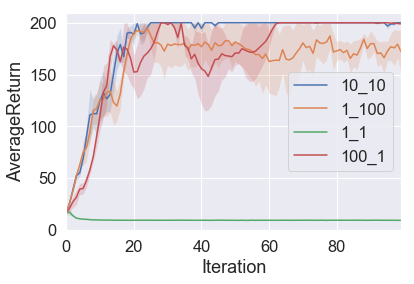

In [4]:
plot.plot_data(data, value="AverageReturn")

## Question 2: Run actor-critic with more difficult tasks

- InvertedPendulum-v2
- HalfCheetah-v2

3


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


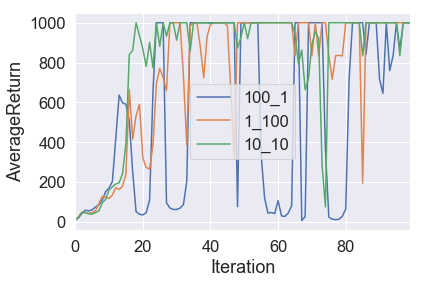

In [5]:
data = []
for logdir in os.listdir('data/'):
    if 'InvertedPendulum-v2' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))
plot.plot_data(data, value="AverageReturn")

3


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


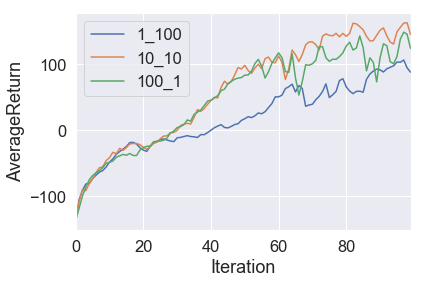

In [6]:
data = []
for logdir in os.listdir('data/'):
    if 'HalfCheetah-v2' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))
plot.plot_data(data, value="AverageReturn")

**Empirical conclusion from running Actor-Critic**
A balance between the updates of critic network is critical

- num_target_updates: how many updates to perform given a target values
- num_grad_steps_per_target_update: how often to recompute the target values